# Calculating the chilean Human Development Index 2015

Author: Mariano Beiró <mariano.beiro@isi.it>

Contributor: Diego Caro <dcaro@udd.cl>

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
comunas = pd.read_csv("input/datos_por_comuna.csv", sep=';', names=['comuna', 'nombre_comuna', 'population','idh'])
comunas.head()

,comuna,nombre_comuna,population,idh
0,13502,Alhué,5454,NaN
1,13402,Buin,78880,NaN
2,13403,Calera de Tango,23152,NaN
3,13102,Cerrillos,82574,0.743
4,13103,Cerro Navia,157412,0.683


In [4]:
escolaridad = (pd.read_csv("input/escolaridad_por_comuna.csv", sep=';', names=["nombre_comuna", "EI"])
                 .merge(comunas))
escolaridad.head()

,nombre_comuna,EI,comuna,population,idh
0,Santiago,13.861480,13101,318253,0.807
1,Cerrillos,10.702480,13102,82574,0.743
2,Cerro Navia,9.869413,13103,157412,0.683
3,Conchalí,10.581390,13104,140561,0.707
4,El Bosque,10.108140,13105,191541,0.711


In [5]:
ingresos = (pd.read_csv("input/ingresos_por_comuna.csv", sep=';', names=["nombre_comuna", "II"])
              .merge(comunas))
ingresos.head()

,nombre_comuna,II,comuna,population,idh
0,Santiago,1400581,13101,318253,0.807
1,Cerrillos,865008,13102,82574,0.743
2,Cerro Navia,621411,13103,157412,0.683
3,Conchalí,665328,13104,140561,0.707
4,El Bosque,756117,13105,191541,0.711


In [6]:
expectativa = (pd.read_csv('input/DEF_2015.csv')
                .rename(columns={'COMUNA':'comuna'}))[['comuna', 'EDAD_TIPO', 'EDAD_CANT']]
expectativa.head()

,comuna,EDAD_TIPO,EDAD_CANT
0,13109,1,56
1,13109,1,70
2,13109,1,70
3,13109,1,83
4,13109,1,94


In [7]:
expectativa['LEI'] = (expectativa.EDAD_CANT * (expectativa.EDAD_TIPO==1)) \
                    +(expectativa.EDAD_CANT * (expectativa.EDAD_TIPO==2) / 12)  \
                    + (expectativa.EDAD_CANT * (expectativa.EDAD_TIPO==3) / 365)

In [8]:
expectativa = expectativa.groupby('comuna', as_index=False)['LEI'].mean()
expectativa.head()

,comuna,LEI
0,1101,68.132146
1,1107,62.017501
2,1401,65.540179
3,1402,71.000000
4,1403,61.000000


In [21]:
datos_hdi = expectativa.merge(ingresos).merge(escolaridad)

In [22]:
datos_hdi.LEI = (datos_hdi.LEI - 20) / (85 - 20)

In [23]:
datos_hdi.EI = datos_hdi.EI / 15 

In [24]:
datos_hdi.II = (np.log(datos_hdi.II*12/519) - np.log(100)) / (np.log(75000) - np.log(100))

In [25]:
datos_hdi["HDI_2013"] = np.power(datos_hdi.LEI*datos_hdi.EI*datos_hdi.II, 0.333333)

In [26]:
datos_hdi.head()

,comuna,LEI,nombre_comuna,II,population,idh,EI,HDI_2013
0,13101,0.791672,Santiago,0.873137,318253,0.807,0.924099,0.861223
1,13102,0.782817,Cerrillos,0.800343,82574,0.743,0.713499,0.764616
2,13103,0.752447,Cerro Navia,0.750382,157412,0.683,0.657961,0.718874
3,13104,0.784872,Conchalí,0.760697,140561,0.707,0.705426,0.749585
4,13105,0.777236,El Bosque,0.780019,191541,0.711,0.673876,0.742015


In [30]:
hdi_path = 'intermediate/hdi_2013_por_comuna.csv'
datos_hdi.to_csv(hdi_path)

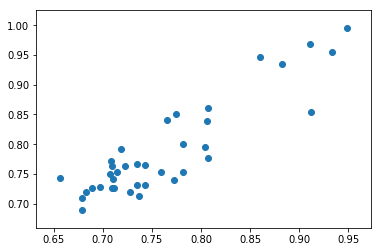

In [31]:
correl = datos_hdi.dropna()
plt.scatter(correl.idh, correl.HDI_2013)
#plt.xlim(0,1)
#plt.xscale('log')
#plt.yscale('log')

In [32]:
stats.pearsonr(correl.idh, correl.HDI_2013)

(0.8980596184232462, 4.866387702587131e-14)